# Introduction


**What?** Your first ANNs in pyTorch



# Import modules

In [2]:
import torch, torchvision
from torch import nn, optim
import torch.nn as nn
import torch.nn.functional as F

In [3]:
print("torch version: ",torch.__version__)
print("torchvision version:", torchvision.__version__)

torch version:  1.7.1
torchvision version: 0.8.2


# Network to classify images

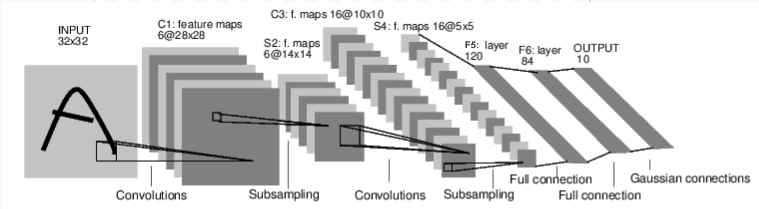

In [4]:
"""
A typical training procedure for a neural network is as follows:

    [1] Define the neural network that has some learnable parameters (or weights)
    [2] Iterate over a dataset of inputs
    [3] Process input through the network
    [4] Compute the loss (how far is the output from being correct)
    [5] Propagate gradients back into the network’s parameters
    [6] Update the weights of the network, typically using a simple update rule:
        weight = weight - learning_rate * gradient
"""

'\nA typical training procedure for a neural network is as follows:\n\n    [1] Define the neural network that has some learnable parameters (or weights)\n    [2] Iterate over a dataset of inputs\n    [3] Process input through the network\n    [4] Compute the loss (how far is the output from being correct)\n    [5] Propagate gradients back into the network’s parameters\n    [6] Update the weights of the network, typically using a simple update rule:\n        weight = weight - learning_rate * gradient\n'

# Definition of the class Net

In [5]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)    

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
"""
The learnable parameters of a model are returned by net.parameters()onine chat
# params[0].conv1's .weight
"""

"\nThe learnable parameters of a model are returned by net.parameters()onine chat\n# params[0].conv1's .weight\n"

In [7]:
params = list(net.parameters())
print("Total number of parameters: ", len(params))
for i in range(len(params)):
    print(params[i].size())  

Total number of parameters:  10
torch.Size([6, 1, 3, 3])
torch.Size([6])
torch.Size([16, 6, 3, 3])
torch.Size([16])
torch.Size([120, 576])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


# Loss function

In [8]:
"""
A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away 
the output is from the target. There are several different loss functions under the nn package . A simple 
loss is: nn.MSELoss which computes the mean-squared error between the input and the target.
"""

'\nA loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away \nthe output is from the target. There are several different loss functions under the nn package . A simple \nloss is: nn.MSELoss which computes the mean-squared error between the input and the target.\n'

In [9]:
dir(net)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'children',
 'conv1',
 'conv2',
 'cpu',
 'cuda',
 'double',
 'du

In [10]:
"""
Let’s try a random 32x32 input. Note: expected input size of this net (LeNet) is 32x32. To use this net on 
the MNIST dataset, please resize the images from the dataset to 32x32.
"""

'\nLet’s try a random 32x32 input. Note: expected input size of this net (LeNet) is 32x32. To use this net on \nthe MNIST dataset, please resize the images from the dataset to 32x32.\n'

In [11]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0150, -0.0312, -0.0637, -0.0378, -0.0676,  0.0149, -0.0120, -0.0447,
          0.0242,  0.0164]], grad_fn=<AddmmBackward>)


In [12]:
output = net(input)
# a dummy target, for example
target = torch.randn(10)  
# make it the same shape as output
target = target.view(1, -1)  
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1646, grad_fn=<MseLossBackward>)


In [13]:
"""
Now, if you follow loss in the backward direction, using its .grad_fn attribute, you will see a graph of 
computations that looks like this:

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
"""

'\nNow, if you follow loss in the backward direction, using its .grad_fn attribute, you will see a graph of \ncomputations that looks like this:\n\ninput -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d\n      -> view -> linear -> relu -> linear -> relu -> linear\n      -> MSELoss\n      -> loss\n'

In [14]:
#For illustration, let us follow a few steps backward:

print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU


# Backprop

In [15]:
"""
To backpropagate the error all we have to do is to loss.backward(). You need to clear the existing gradients 
though, else gradients will be accumulated to existing gradients.
"""

'\nTo backpropagate the error all we have to do is to loss.backward(). You need to clear the existing gradients \nthough, else gradients will be accumulated to existing gradients.\n'

In [16]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

#loss.backward(retain_graph=True)
loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0027, -0.0214,  0.0218, -0.0096, -0.0050,  0.0142])


# References


- https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

